### 환경설정

In [640]:
import JAEN
from JAEN import list_data, download_data, Project

In [641]:
project_name = "타이타닉 생존자 예측" # 프로젝트 이름(수정하지 마세요)
email = "scsa2407" # 이메일(본인 SCSA 이메일 아이디 입력)

class_info = {
    'edu_name':'SCSA', # 과정명
    'edu_rnd':'24기', # 차수
    'edu_class':'SW' # "없음"이면 빈 문자열
}

# 프로젝트 생성
pjt = Project(project_name=project_name, class_info=class_info, email=email)

### 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# 경고 무시
warnings.filterwarnings('ignore')

## 다운로드 및 데이터 로드

In [643]:
download_data(project_name)

파일 다운로드 완료

데이터셋: 타이타닉 생존자 예측
파일경로: data\submission.csv

파일 다운로드 완료

데이터셋: 타이타닉 생존자 예측
파일경로: data\test.csv

파일 다운로드 완료

데이터셋: 타이타닉 생존자 예측
파일경로: data\train.csv



In [644]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")
submission # 제출 파일

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [645]:
train.head() # PassengerId 버리기, Survived 가 target
train = train.iloc[:,1:]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [646]:
test = test.iloc[:,1:]
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## ↓↓↓ 코드 구현 ↓↓↓
### 여기서부터 코드를 작성/수정하세요
#### - 데이터셋 로드, 전처리(필요시), 모델생성/컴파일, 학습

### 1. 데이터 전처리

In [647]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [648]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [649]:
train.isnull().sum()
# 결측치 처리 해야하는 거 확인

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

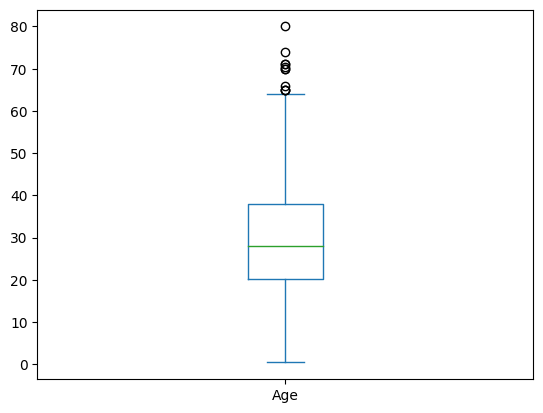

In [650]:
train["Age"].plot(kind = "box") # 박스플랏 출력
# 이상치는 있지만 무시해도 되는 정도.

In [651]:
# train["Age"].plot(kind = "line") # 박스플랏 출력

In [652]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [653]:
train["Ticket"].value_counts() # ticket 데이터는 사용하지 않겠음
train = train.drop("Ticket",axis = 1)
test = test.drop("Ticket",axis = 1)

In [654]:
# 성씨 사용
train["first"] = 0
for i in range(train.shape[0]):
    train["first"][i] = train["Name"][i].split(",")[0]

test["first"] = 0
for i in range(test.shape[0]):
    test["first"][i] = test["Name"][i].split(",")[0]


In [655]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,first
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,Montvila
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,Graham
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,Johnston
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,Behr


In [656]:
train = train.drop(columns = ["Name"])
test = test.drop(columns = ["Name"])

In [657]:
# Cabin

train = train.drop(columns = ["Cabin"])
test = test.drop(columns = ["Cabin"])

In [658]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,first
0,0,3,male,22.0,1,0,7.2500,S,Braund
1,1,1,female,38.0,1,0,71.2833,C,Cumings
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,Allen
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Montvila
887,1,1,female,19.0,0,0,30.0000,S,Graham
888,0,3,female,NaN,1,2,23.4500,S,Johnston
889,1,1,male,26.0,0,0,30.0000,C,Behr


### 2. 인코딩

In [659]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["Sex"] = encoder.fit_transform(train["Sex"])
test["Sex"] = encoder.fit_transform(test["Sex"])

In [660]:
encoder = LabelEncoder()
train["Embarked"] = encoder.fit_transform(train["Embarked"])
test["Embarked"] = encoder.fit_transform(test["Embarked"])

In [661]:
encoder = LabelEncoder()
train["first"] = encoder.fit_transform(train["first"])
test["first"] = encoder.fit_transform(test["first"])

In [662]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,first
0,0,3,1,22.0,1,0,7.2500,2,73
1,1,1,0,38.0,1,0,71.2833,0,136
2,1,3,0,26.0,0,0,7.9250,2,251
3,1,1,0,35.0,1,0,53.1000,2,198
4,0,3,1,35.0,0,0,8.0500,2,11


In [663]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,first
0,3,1,34.5,0,0,7.8292,1,172
1,3,0,47.0,1,0,7.0000,2,339
2,2,1,62.0,0,0,9.6875,1,231
3,3,1,27.0,0,0,8.6625,2,344
4,3,0,22.0,1,1,12.2875,2,150


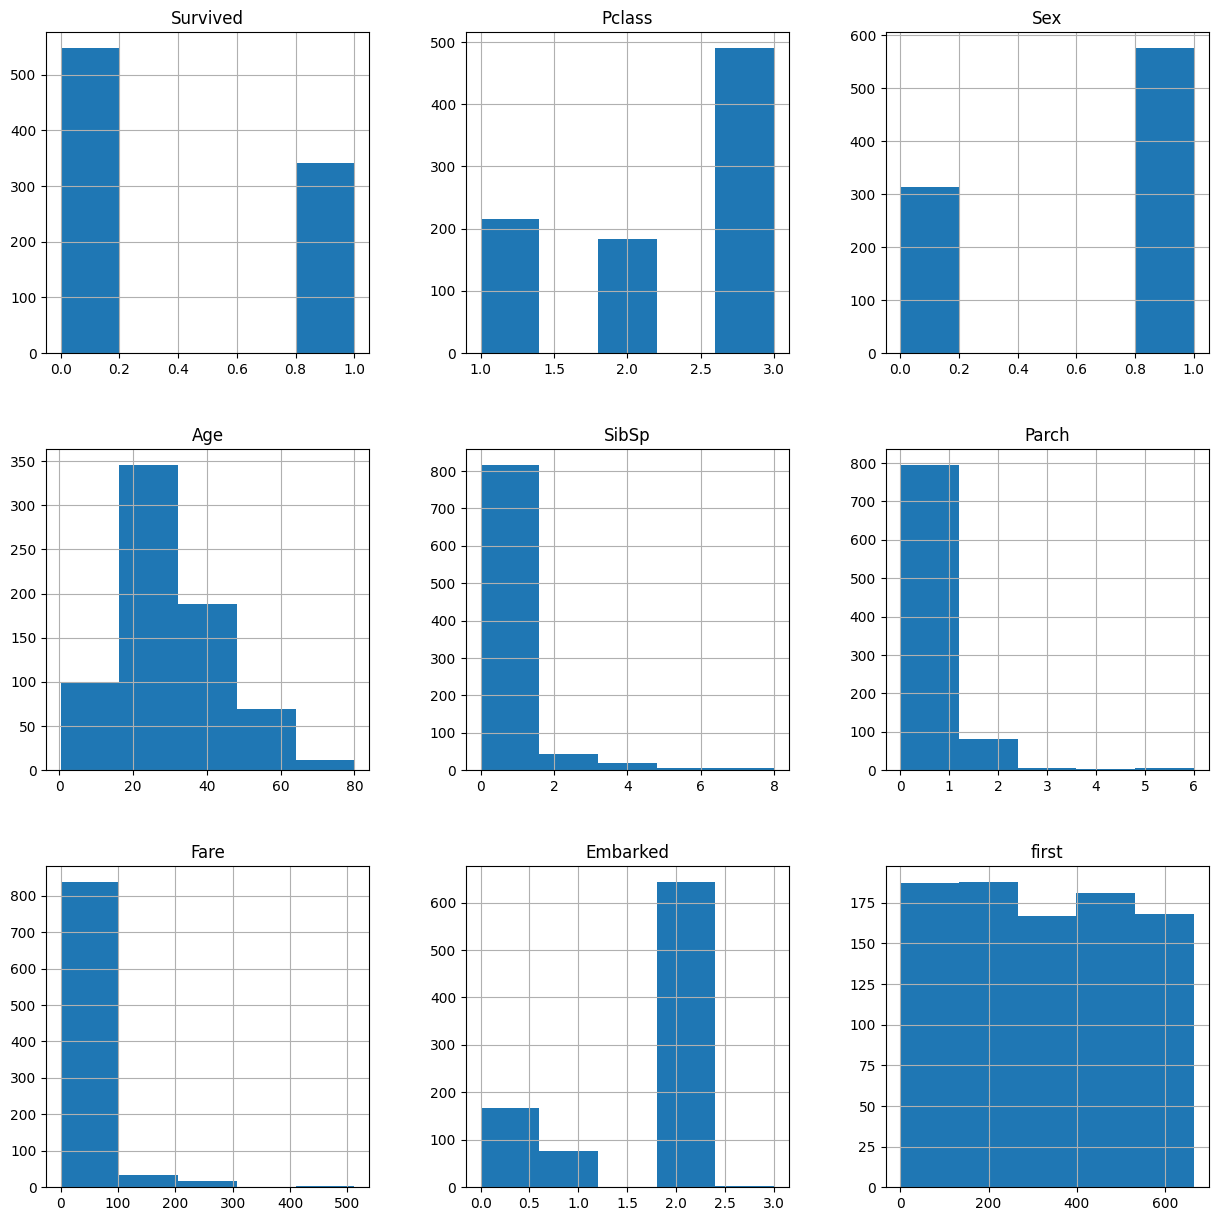

In [664]:
# 데이터 분포 확인
train.hist(figsize=(15,15), bins=5)
plt.show()

In [665]:
train["Age"].median()

28.0

In [666]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,first
0,0,3,1,22.0,1,0,7.2500,2,73
1,1,1,0,38.0,1,0,71.2833,0,136
2,1,3,0,26.0,0,0,7.9250,2,251
3,1,1,0,35.0,1,0,53.1000,2,198
4,0,3,1,35.0,0,0,8.0500,2,11
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,406
887,1,1,0,19.0,0,0,30.0000,2,221
888,0,3,0,NaN,1,2,23.4500,2,293
889,1,1,1,26.0,0,0,30.0000,0,52


In [667]:
train["family"] = train["SibSp"] + train["Parch"]
test["family"] = test["SibSp"] + test["Parch"]

In [668]:
train = train.drop(columns = ["SibSp"])
test = test.drop(columns = ["SibSp"])


train = train.drop(columns = ["Parch"])
test = test.drop(columns = ["Parch"])

In [669]:
# 나이 결측치 선형보간법으로 처리
from scipy import interpolate

x = np.arange(len(train))  
mask = ~train['Age'].isna()  
x_valid = x[mask]  
y_valid = train['Age'][mask] 


f = interpolate.interp1d(x_valid, y_valid, kind='linear', fill_value="extrapolate")

train['Age'] = f(x)

In [670]:

from scipy import interpolate

x = np.arange(len(test))  
mask = ~test['Age'].isna()  
x_valid = x[mask] 
y_valid = test['Age'][mask] 

f = interpolate.interp1d(x_valid, y_valid, kind='linear', fill_value="extrapolate")

test['Age'] = f(x)

In [671]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
first       0
family      0
dtype: int64

In [672]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [673]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
first       0
family      0
dtype: int64

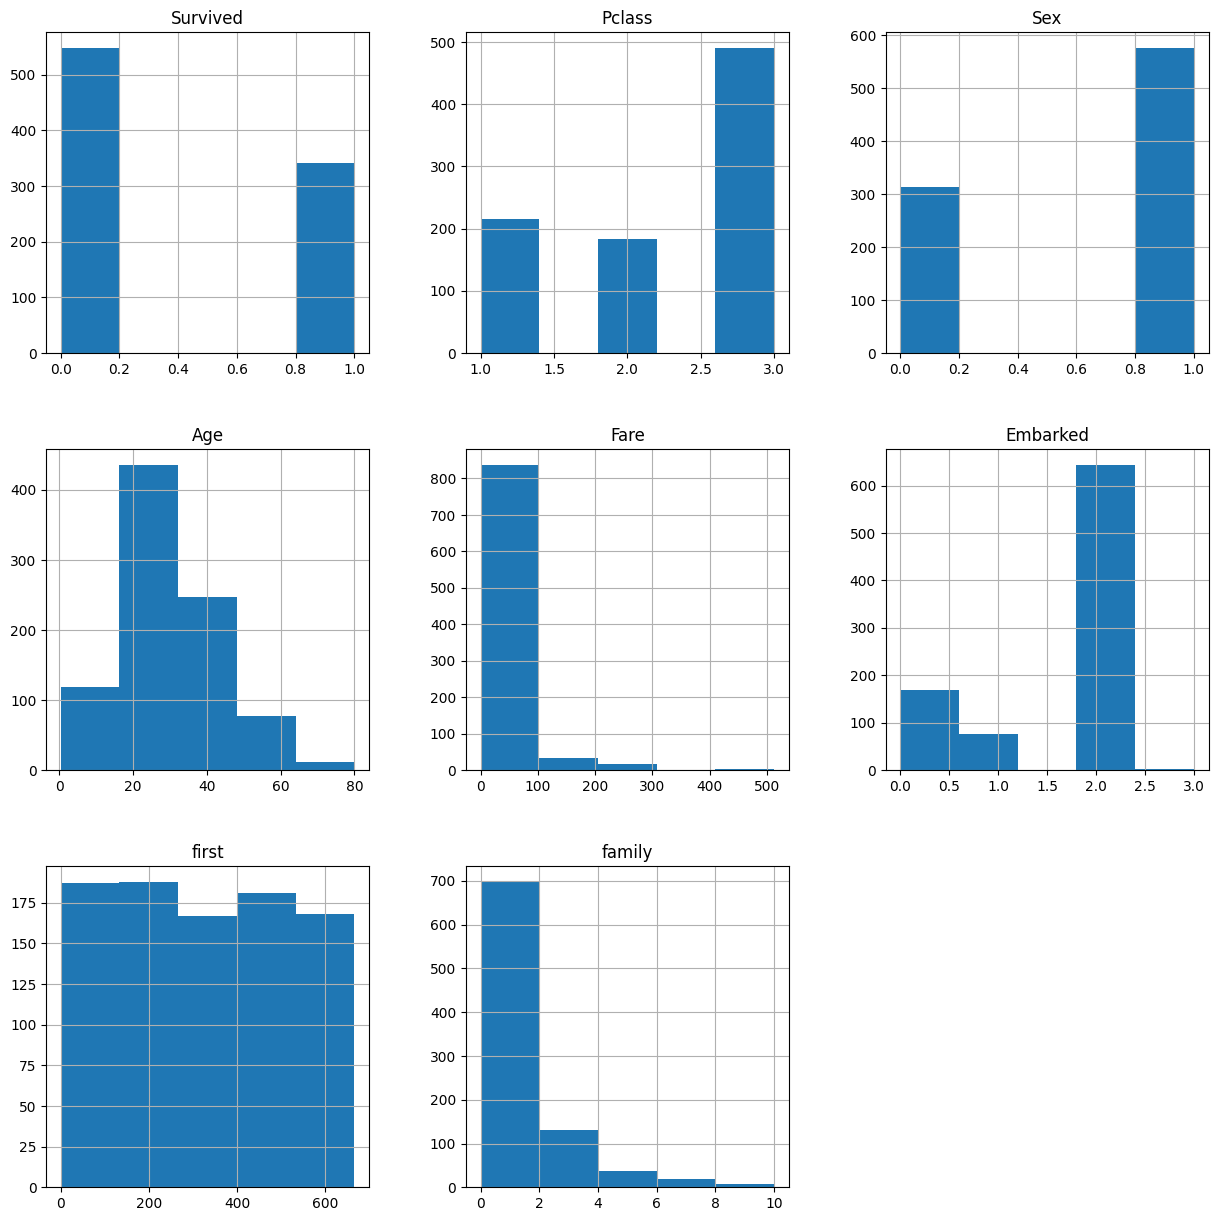

In [674]:
# 데이터 분포 확인
train.hist(figsize=(15,15), bins=5)
plt.show()

In [675]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,first,family
0,0,3,1,22.0,7.2500,2,73,1
1,1,1,0,38.0,71.2833,0,136,1
2,1,3,0,26.0,7.9250,2,251,0
3,1,1,0,35.0,53.1000,2,198,1
4,0,3,1,35.0,8.0500,2,11,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,406,0
887,1,1,0,19.0,30.0000,2,221,0
888,0,3,0,22.5,23.4500,2,293,3
889,1,1,1,26.0,30.0000,0,52,0


In [676]:
X = train.iloc[:,1:]
X
y = train["Survived"]

In [677]:
# scaler


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
test = scaler.fit_transform(test)

In [678]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
print(model.score(X, y))

1.0


In [679]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators':[90,100,110], 'max_depth':[None, 5,10]}
gridS = GridSearchCV(RandomForestClassifier(), params).fit(X, y)

gridS.best_params_

{'max_depth': 10, 'n_estimators': 90}

In [680]:
# 아래의 코드는 필요시 수정해서 사용합니다
pred = gridS.predict(test)
your_answer = pred
your_answer

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [681]:
# # 아래의 코드는 필요시 수정해서 사용합니다
# pred = model.predict(test)
# your_answer = pred
# your_answer

In [682]:
submission['Survived'] = your_answer

In [683]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 제출 횟수 제한 있습니다. (총 30회)

In [684]:
pjt.submit(submission)

파일을 저장하였습니다. 파일명: submission-12-15-50.csv
제출 여부 :success
오늘 제출 횟수 : 19
제출 결과:0.7679425837320574
